# MLP Multistep multivariate Forecasting


In [1]:
import pandas as pd 
import tensorflow as tf
df = pd.read_csv('ISTATX_transformed.csv')
df.set_index('10MIN_TIMESTAMP')

,TARGET_NAME,TARGET_GUID,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),Sorts in Memory (%),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)
10MIN_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-09-11 14:00:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,839.051,0.0,0.000,100.000,97.371,35.435,9.007,100.000,...,27.538,0.488,0.526,6.078,0.608,272.373,0.0,709.581,79032.649,1.254
2019-09-11 14:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1974.909,0.0,0.000,100.000,93.148,43.160,1.983,100.000,...,2.949,0.113,1.561,4.043,0.127,254.470,0.0,396.401,6913.292,1.058
2019-09-11 14:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,998.234,0.0,0.000,100.000,98.669,52.094,4.167,100.000,...,3.593,29.400,0.068,65.871,107.195,844.889,0.0,259430.422,20580.538,1.636
2019-09-11 14:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1451.615,0.0,0.000,100.000,68.563,91.018,15.951,99.969,...,30.746,77.621,4.527,36.868,124.272,9841.760,0.0,158688.275,96763.853,1.684
2019-09-11 14:40:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,3970.455,0.0,0.013,100.000,86.197,62.206,1.631,99.941,...,2.335,45.502,5.682,17.806,103.918,2135.373,0.0,81412.382,13756.376,1.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19 13:10:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1840.426,0.0,0.000,99.999,88.219,54.829,1.726,99.925,...,1.572,0.201,1.174,23.743,5.811,466.551,0.0,21035.396,28952.743,1.733
2019-09-19 13:20:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,549.790,0.0,0.000,99.999,99.046,49.447,1.180,100.000,...,0.126,0.154,0.327,5.833,2.012,152.832,0.0,1785.689,2080.242,0.621
2019-09-19 13:30:00,ISTATX_istatx1,8268AEA46CC9AC6FE05312CAC582DD1E,1087.638,0.0,0.000,99.997,79.040,62.552,3.782,100.000,...,1.500,0.173,1.928,21.497,1.935,912.089,0.0,12552.082,19619.102,0.661


In [2]:
df.dropna(inplace=True)
null_data = df[df.isnull().any(axis=1)]
null_data

,10MIN_TIMESTAMP,TARGET_NAME,TARGET_GUID,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)


In [3]:
df.drop(['10MIN_TIMESTAMP','TARGET_NAME','TARGET_GUID'], axis=1)

,CPU Usage (per second),Parallel Execution Downgraded 50% or more (per second),Parallel Execution Downgraded to Serial (per second),Redo Log Allocation Hit (%),Database CPU Time (%),Buffer Cache Hit (%),Library Cache Miss (%),Sorts in Memory (%),Library Cache Hit (%),Parallel Execution Downgraded to Serial (per transaction),...,Scans on Long Tables (per transaction),Consistent Read Blocks Created (per transaction),Active Sessions Waiting: I/O,Enqueue Waits (per second),Consistent Read Blocks Created (per second),Physical Writes Direct (per transaction),Enqueue Deadlocks (per second),Database Block Gets (per second),Physical Reads Direct (per second),Enqueue Timeout (per second)
0,839.051,0.0,0.000,100.000,97.371,35.435,9.007,100.000,90.993,0.000,...,27.538,0.488,0.526,6.078,0.608,272.373,0.0,709.581,79032.649,1.254
1,1974.909,0.0,0.000,100.000,93.148,43.160,1.983,100.000,98.017,0.000,...,2.949,0.113,1.561,4.043,0.127,254.470,0.0,396.401,6913.292,1.058
2,998.234,0.0,0.000,100.000,98.669,52.094,4.167,100.000,95.833,0.000,...,3.593,29.400,0.068,65.871,107.195,844.889,0.0,259430.422,20580.538,1.636
3,1451.615,0.0,0.000,100.000,68.563,91.018,15.951,99.969,84.049,0.000,...,30.746,77.621,4.527,36.868,124.272,9841.760,0.0,158688.275,96763.853,1.684
4,3970.455,0.0,0.013,100.000,86.197,62.206,1.631,99.941,98.369,0.052,...,2.335,45.502,5.682,17.806,103.918,2135.373,0.0,81412.382,13756.376,1.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1677.623,0.0,0.000,99.999,84.669,61.675,2.689,99.861,97.311,0.000,...,3.053,0.231,2.906,24.750,7.503,442.606,0.0,58716.753,34457.945,2.124
1147,1840.426,0.0,0.000,99.999,88.219,54.829,1.726,99.925,98.274,0.000,...,1.572,0.201,1.174,23.743,5.811,466.551,0.0,21035.396,28952.743,1.733
1148,549.790,0.0,0.000,99.999,99.046,49.447,1.180,100.000,98.820,0.000,...,0.126,0.154,0.327,5.833,2.012,152.832,0.0,1785.689,2080.242,0.621
1149,1087.638,0.0,0.000,99.997,79.040,62.552,3.782,100.000,96.218,0.000,...,1.500,0.173,1.928,21.497,1.935,912.089,0.0,12552.082,19619.102,0.661


### Wahl der Auslastungswerte

In [4]:
features_considered=['CPU Usage (per second)','CPU Usage (per transaction)','Host CPU Utilization (%)','Average Instance CPU (%)','Database CPU Time (%)','Database Time (centiseconds per second)','Active Sessions Using CPU','Average Active Sessions','Active Sessions Waiting: I/O','Wait Time (%)','Enqueue Waits (per transaction)','Enqueue Waits (per second)','I/O Requests (per second)','Enqueue Requests (per second)','Enqueue Requests (per transaction)']
features = df[features_considered]
features.index = df['10MIN_TIMESTAMP']
features.head()

,CPU Usage (per second),CPU Usage (per transaction),Host CPU Utilization (%),Average Instance CPU (%),Database CPU Time (%),Database Time (centiseconds per second),Active Sessions Using CPU,Average Active Sessions,Active Sessions Waiting: I/O,Wait Time (%),Enqueue Waits (per transaction),Enqueue Waits (per second),I/O Requests (per second),Enqueue Requests (per second),Enqueue Requests (per transaction)
10MIN_TIMESTAMP,,,,,,,,,,,,,,,
2019-09-11 14:00:00,839.051,4188.262,13.068484,11.373,97.371,2124.198,10.008,21.242,0.526,3.044403,4.881,6.078,5658.987,70.536,56.637
2019-09-11 14:10:00,1974.909,1019.802,25.589807,22.457,93.148,834.111,19.762,8.341,1.561,4.912818,3.615,4.043,199.801,36.841,32.937
2019-09-11 14:20:00,998.234,2335.711,12.095209,9.927,98.669,2207.380,8.736,22.074,0.068,0.886582,18.066,65.871,13633.062,245.708,67.390
2019-09-11 14:30:00,1451.615,291.882,21.329274,18.015,68.563,3987.869,15.853,39.879,4.527,25.318306,23.028,36.868,9756.294,132.322,82.650
2019-09-11 14:40:00,3970.455,15544.463,46.546902,42.265,86.197,2132.914,37.193,21.329,5.682,13.480704,7.797,17.806,5311.699,124.000,54.295


In [5]:
features.plot(subplots=True,figsize=(12,25)); # 2 Mal ausführen wenn der Plot nicht aufs erste mal angeziegt wird 

## Feature Enginering


In [6]:
# # Converting the index as date
# features.index = pd.to_datetime(features.index)
# hours = features.index.hour
# weekday =features.index.dayofweek
# features['hour']=hours
# features['weekday']=weekday

In [7]:
# features.tail()

## TRAIN/TEST SPLIT UND VORBEREITUNG DER DATEN

In [8]:
pred_horizon = 30 # steps
n_history  = 33

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

dataset = features.values

# standardise
scaler = StandardScaler()
scaler.fit(dataset[:-pred_horizon])
dataset = scaler.transform(dataset)

train=dataset[:-pred_horizon]
test= dataset[-pred_horizon:,[2]] # Host CPU Utilization (%)
dataset=np.append(dataset, dataset[:,[2]], axis=1)
sequences=dataset[:-pred_horizon]

In [10]:
from numpy import array
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [11]:
# convert into input/output
X, y = split_sequences(sequences, n_history, pred_horizon)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

## Model Definition

In [12]:
n_input

495

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [14]:
n_neurons= int ((n_input +pred_horizon)/2)
n_neurons

262

In [15]:
# define model
model = Sequential()
model.add(Dense(n_neurons, activation='relu', input_dim=n_input))
model.add(Dense(pred_horizon))
model.compile(optimizer='adam', loss='mse', metrics= ['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 262)               129952    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                7890      
Total params: 137,842
Trainable params: 137,842
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=20)
mc = ModelCheckpoint('mlp_multistep_multivariate.h5', monitor = 'val_accuracy' , mode = 'max', verbose= 1, save_best_only=True)

## Model Training

In [18]:
model.fit(X, y,  validation_split=0.1,epochs=100, callbacks=[es, mc])

Train on 954 samples, validate on 106 samples
Epoch 1/100
954/954 [==============================] - 0s 215us/step - loss: 1.1872 - accuracy: 0.0482 - val_loss: 0.7961 - val_accuracy: 0.0377

Epoch 00001: val_accuracy improved from -inf to 0.03774, saving model to mlp_multistep_multivariate.h5
Epoch 2/100
954/954 [==============================] - 0s 104us/step - loss: 0.7116 - accuracy: 0.0660 - val_loss: 0.7979 - val_accuracy: 0.0566

Epoch 00002: val_accuracy improved from 0.03774 to 0.05660, saving model to mlp_multistep_multivariate.h5
Epoch 3/100
954/954 [==============================] - 0s 104us/step - loss: 0.5918 - accuracy: 0.1006 - val_loss: 0.7958 - val_accuracy: 0.0566

Epoch 00003: val_accuracy did not improve from 0.05660
Epoch 4/100
954/954 [==============================] - 0s 102us/step - loss: 0.5185 - accuracy: 0.1226 - val_loss: 0.7970 - val_accuracy: 0.0472

Epoch 00004: val_accuracy did not improve from 0.05660
Epoch 5/100
954/954 [==============================

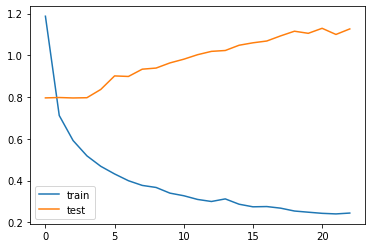

In [19]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'], label = 'train')
plt.plot(model.history.history['val_loss'], label = 'test')
plt.legend()

## Vorhersage

In [20]:
from keras.models import load_model
model= load_model('mlp_multistep_multivariate.h5')

In [21]:
pred_input = train[-n_history:]
pred_input.shape

# flatten input
n_input = pred_input.shape[0] * pred_input.shape[1]
pred_input = pred_input.reshape((1,n_input))
prediction=model.predict(pred_input)

## Denormalisierung

In [22]:
prediction=prediction.reshape((pred_horizon,1))
prediction = np.hstack((prediction, np.zeros((prediction.shape[0], 14), dtype=prediction.dtype)))
prediction=prediction = scaler.inverse_transform(prediction)
prediction=prediction[:,[0]]

In [23]:
prediction

array([[3221.641  ],
       [1680.5635 ],
       [1338.7454 ],
       [1630.602  ],
       [1398.3639 ],
       [1025.7655 ],
       [1379.9459 ],
       [1379.99   ],
       [1550.024  ],
       [1774.6395 ],
       [1517.4104 ],
       [ 920.59595],
       [1215.3209 ],
       [1555.1986 ],
       [ 979.2787 ],
       [1431.6141 ],
       [1937.1876 ],
       [2011.7977 ],
       [1742.0902 ],
       [2486.2725 ],
       [2354.7522 ],
       [2205.7776 ],
       [1993.4255 ],
       [ 394.1092 ],
       [ 769.3882 ],
       [ 812.65497],
       [1402.2018 ],
       [1365.7435 ],
       [ 333.26788],
       [ 923.92175]], dtype=float32)

In [24]:
test
test = np.hstack((test, np.zeros((test.shape[0], 14), dtype=test.dtype)))
test=scaler.inverse_transform(test)
test=test[:,[0]]

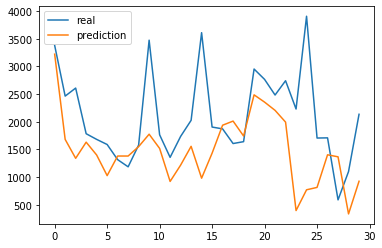

In [25]:
import matplotlib.pyplot as plt
plt.plot(test, label="real")
plt.plot(prediction,  label="prediction")
plt.legend(loc='best')
plt.show()

In [26]:
rmse=np.sqrt(np.mean((prediction-test)**2))
rmse

1024.1302094992081